## Regressão Logística com Cross Validation

Dados do dataset biopsy com dados de biopsias de amostras malignas e benignas, em que as malignas representam a presennça de celulas cacerosas. O modelo visa identificar com precisão quais são as malignas e as benignas.

In [ ]:
install.packages("ROCR")
install.packages("dummies")
install.packages("caret") 
install.packages("e1071") 
library(ROCR)
library(dummies)
library(caret) # for Cross Validation functions
library(e1071)

library(MASS) # Biblioteca com a base de dados "biopsy" que será usada neste estudo
library(dplyr) # Analises estatisticas
library(ggplot2) # Exploração Gráfica
library(class) # Para usar a função knn() para o modelo de k-vizinhos mais próximos
library(glue) # print especial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Transformando os dados

In [ ]:
df <- na.omit(biopsy[,-c(1)])
sum(is.na(df$V6))

[1] 0

In [ ]:
head(df)
df$class <- as.character(df$class)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


In [ ]:
df["class"][df["class"] == "malignant"] <- 0
df["class"][df["class"] == "benign"] <- 1

In [ ]:
df$class <- as.factor(df$class)

In [ ]:
head(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,5,1,1,1,2,1,3,1,1,1
2,5,4,4,5,7,10,3,2,1,1
3,3,1,1,1,2,2,3,1,1,1
4,6,8,8,1,3,4,3,7,1,1
5,4,1,1,3,2,1,3,1,1,1
6,8,10,10,8,7,10,9,7,1,0


In [ ]:
sum(is.na(df))

[1] 0

## Criando o modelo de regressão logística com cross validation

Mesmo que o modelo sendo aplicado em loop para a reamostragem, há a chance de nem todos os dados serem usados como treino e teste, podendo ser repetidos. O crossvalidation faz a repartição dos dados em n vezes e reparte os dados de forma que todos os dados sejam usados como treino e teste ao menos uma vez, otimizando a seleção da amostra.

In [ ]:
ctrl <- trainControl(method="repeatedcv", number=683, repeats=1)

In [ ]:
nrow(df)

[1] 683

In [ ]:
fit <- train(class~., data=df, method="glm", family="binomial", trControl=ctrl, preProcess = c("center", "scale"))
fit

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Generalized Linear Model 

683 samples
  9 predictor
  2 classes: '0', '1' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (683 fold, repeated 1 times) 
Summary of sample sizes: 682, 682, 682, 682, 682, 682, ... 
Resampling results:

  Accuracy   Kappa
  0.9677892  0    


In [ ]:
summary(fit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4698  -0.0222   0.0619   0.1153   3.4841  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.09414    0.32333   3.384 0.000714 ***
V1          -1.50915    0.40060  -3.767 0.000165 ***
V2           0.01925    0.64085   0.030 0.976039    
V3          -0.96443    0.68917  -1.399 0.161688    
V4          -0.94713    0.35363  -2.678 0.007400 ** 
V5          -0.21483    0.34812  -0.617 0.537159    
V6          -1.39569    0.34195  -4.082 4.47e-05 ***
V7          -1.09547    0.41983  -2.609 0.009073 ** 
V8          -0.65031    0.34457  -1.887 0.059115 .  
V9          -0.92670    0.56966  -1.627 0.103788    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 884.35  on 682  degrees of freedom
Residual deviance: 102.89  on 673  degrees of freedom
AIC: 122.89

Number of Fisher Scoring iter

In [ ]:
# A probailidade de pertencer a uma ou à outra classe
predict_test_prob = predict(fit, newdata= df, type="prob")
head(round(predict_test_prob,3))

,0,1
,<dbl>,<dbl>
1,0.016,0.984
2,0.909,0.091
3,0.008,0.992
4,0.761,0.239
5,0.018,0.982
6,1.000,0.000


In [ ]:
# Ajustanto para ver apenas os valores acima de 50% temos a classificação como 0 ou 1
# Probabilidade acima de 50% para 0 será 0, acima de 50% para 1 será 1
predict_test_prob = predict(fit, newdata= df, type="prob")>0.5
head(predict_test_prob)

,0,1
1,FALSE,TRUE
2,TRUE,FALSE
3,FALSE,TRUE
4,TRUE,FALSE
5,FALSE,TRUE
6,TRUE,FALSE


In [ ]:
predict_test = predict(fit, newdata= df, type="raw")
predict_test

[1] 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 [38] 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 [75] 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
[112] 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
[149] 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0
[186] 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0
[223] 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
[260] 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1
[297] 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1
[334] 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
[371] 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
[408] 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1
[445] 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1
[482] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1
[519] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
[556] 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1
[593] 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
[630] 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0
[667] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0
Levels: 0 1

## Avaliando o modelo

In [ ]:
matconf <- table(df$class, predict_test, dnn = list("Previsto", "Real"))
matconf

        Real
Previsto   0   1
       0 228  11
       1  10 434

In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 434

Verdadeiro Negativo = 228

Falso Positivo =      10

Falso Negativo =      11

Número de eventos = 0

Número de não eventos = 0

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.969

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.975

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 0.958

A Curva ROCR

A curva ROC é construída com base nos valores true positive (tpr)
e false positive (fpr). A área AUC representa a área abaixo da linha
ROC, sendo seu valor ideal, de máxima predição, igual a 1. (pacote ROCR)

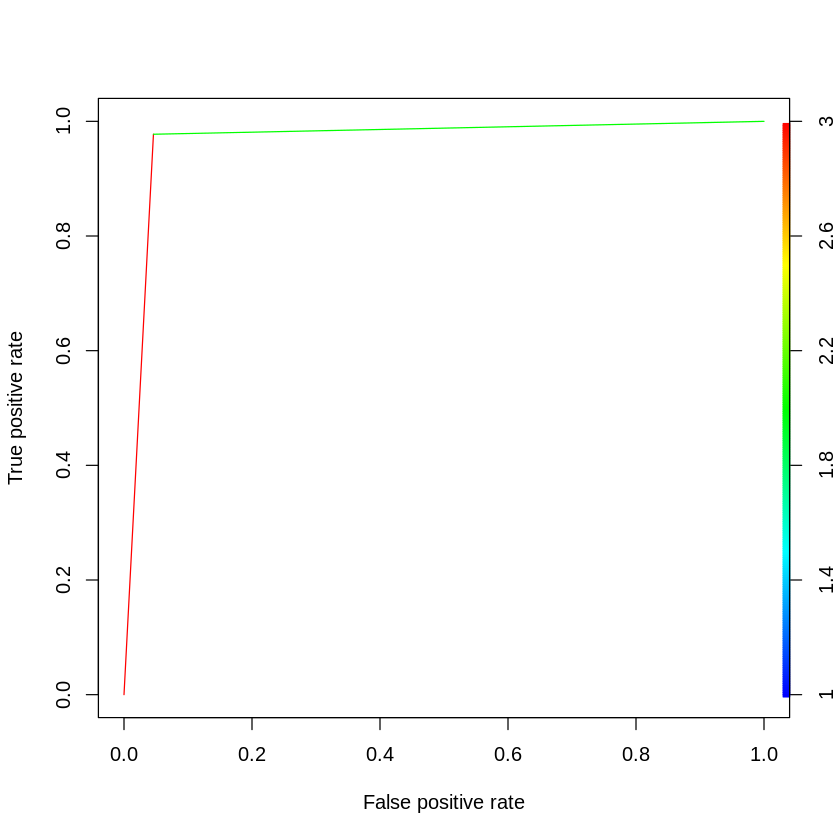

In [ ]:
# ROC curve 
pr=prediction(as.numeric(predict_test), as.numeric(df$class))
prf=performance(pr, measure="tpr", x.measure="fpr")
plot(prf,colorize=TRUE)

In [ ]:
# Area under ROC curve 
auc=performance(pr, measure="auc")
auc=auc@y.values[[1]]
auc

[1] 0.9657262

A área AUC representa a área abaixo da linha
ROC, sendo seu valor ideal, de máxima predição, igual a 1.